Analysing Tweets on Algorithmic Bias 



<tr>
    <td> <img src="https://nxtmuseum.com/content/uploads/2020/07/02_Coded_Gaze-1-768x641.jpg" width="400" height ="350"/> </td>

</tr>

# Introduction

For this assignment we will consider a group we call the "*Ethical AI Group*" (*EIG*). This group is comprised of:

*   Timnit Gebru
*   Algorithmic Justice League (headed by Joy Buolamwini)
*   Emily Benders
*   Margaret Mitchell
*   Rachel Thomas
*   Anna Rogers
*   Rumman Chowdhury

This group of social and political scientists work on issues such as algorithmic bias and fairness. Their work particularly highlights how bias in code and data can lead to discrimination against marginalised groups. Finally, they also advocate for "who codes matters" since more diversity in technologists/programmers allows for lesser bias to enter technologies.

A few poignant examples of algorithmic bias are 

*   The [ProPublica study](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing) on bias in the tool using for determining parole sentences in the US.
*   Timnit Gebru and Joy Buolamwini's project [Gender Shades](https://http://gendershades.org/) on the bias in facial recognition algorithms.
*   Emily Bender, Timnit Gebru et al's [paper](https://dl.acm.org/doi/10.1145/3442188.3445922) on the ethical issues in building natural language processing systems using machine learning from large text corpora.

On that note, we thought it would be interesting to analyse the tweets of these forerunners in algorithmic justice.

# Data

The data can be found within the file `ai_ethics.csv`. This file contains twitter data on tweets (every row is one tweet) by the members of 


FYI: This data was acquired from Twitter using their API if you're interested.

# Tasks

We would like to look through some recent tweets of the members of *EIG*, and be able to understand certain characteristics of their tweets and through that their online presence and what they stand for. 

Make your code and results as pretty as possible, and feel free to use tabs and enumeration when printing text and formatting for the visualisations. 

This assignment is about getting familiar with Pandas' methods — we suggest going through the lecture and seminar notebooks on Pandas again. You can of course use any course material in this assignment!

### Question 1: Pre-processing
* Add a column with a normalised version of the 'text' column. Use a tokenizer in your normalization function.

Continue to work with this column in the next tasks. You're of course free to add more columns if you think you need them. 

In [5]:
import csv
import nltk
import calendar
import numpy as np
import pandas as pd
from tokenize import tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from pandas.core.arrays.categorical import contains
nltk.download('punkt')

def normalize_text(text):
    """Convert text to lowercase"""
    lower_cased_text = [line.lower() for line in text]

    """Remove function words"""
    function_words = ['the', 'a', 'an', 'and', 'but', 'for', 'so', 'since', 'as', 'in', 'to', 'be', 'or', 'at', 'of', 'is', 'you', 'with', 'your', 'my', 'its', 'it', ':']
    remove_function_words = []
    for line in lower_cased_text:
        for word in function_words:
            line = line.replace(word, '')
        remove_function_words.append(line)
    
    return remove_function_words

def main(): 
    df = pd.read_csv('ai_ethics_tweets.csv', index_col=[0])
    normalized_text = normalize_text(df['text']) 
    df['normalized_text'] = normalized_text
    df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['normalized_text']), axis=1)
    df.to_csv('ai_ethics_tweets.csv')

main()

ModuleNotFoundError: No module named 'nltk'

### Question 2: Description / statistics

Provide information on: 

* Number of tweets (per user and in total)
* Most retweeted tweet (per user and in total)
* Most liked tweet (per user and in total)
* Most frequent hashtags (per user and in total)

You can present the answers in this notebook.

If you prefer, you may also write down your results to a separate text file (optional).

In [ ]:

file = open('Statistics.txt','w')
df = pd.read_csv('ai_ethics_tweets.csv', usecols=['username','normalized_text','retweet_count','favorite_count'])

def NumberOfTweets():
    countAllTweets = len(df['username'])
    
    file.write("\n\nAll Tweets\n\n")
    file.write(str(countAllTweets))
    
    print("\nAll Tweets\n")
    print(countAllTweets)  

def NumberOfTweetsPerUser():
    countAllUsersTweets = df['username'].value_counts().head(20)

    file.write("\n\nTweets of every user\n\n")
    file.write(str(countAllUsersTweets))

    print("\nTweets of every user\n")
    print(countAllUsersTweets)

def MostRetweetedTweet():
    maxRetweetedTweet = df['retweet_count'].max()
    retweetedTweet = df[df['retweet_count'] == maxRetweetedTweet]
    
    file.write("\n\nMax Retweeted Tweet\n\n")
    file.write(str(retweetedTweet))

    print("\nMax Retweeted Tweet\n")
    print(retweetedTweet)

def MostRetweetedTweetPerUser(): 
    listOfUsers = df['username'].unique()

    file.write("\n\nMax Retweeted Tweet Per User\n\n")
    print("\nMax Retweeted Tweet Per User\n")

    for user in listOfUsers:
      
      sortUsers = df[df['username'] == user]
      maxRetweetedTweetPerUser = sortUsers['retweet_count'].max()
      retweetedTweet = sortUsers[sortUsers['retweet_count'] == maxRetweetedTweetPerUser]

      file.write(str(retweetedTweet))
      print(retweetedTweet)

def MostFavoriteTweet():
    maxFavoriteTweet = df['favorite_count'].max()
    favoriteTweet = df[df['favorite_count'] == maxFavoriteTweet]

    file.write("\n\nMax Favorite Tweet\n\n")
    file.write(str(favoriteTweet))

    print("\nMax Favorite Tweet\n")
    print(favoriteTweet)

def MostFavoriteTweetPerUser():
    file.write("\n\nMax Favorite Tweet \n\n")
    print("\nMax Favorite Tweet \n")

    listOfUsers = df['username'].unique()
    for user in listOfUsers:
      sortUsers = df[df['username'] == user]
      maxFavoriteTweetPerUser = sortUsers['favorite_count'].max()
      favoriteTweet = sortUsers[sortUsers['favorite_count'] == maxFavoriteTweetPerUser]
      
      file.write(str(favoriteTweet))
      print(favoriteTweet)

def MostFrequentHashtagPerUser():
    file.write("\n\nMost Frequent Hashtag Per User\n\n")
    print("\nMost Frequent Hashtag Per User\n")
    
    listOfUsers = df['username'].drop_duplicates(keep='first')  
    for user in listOfUsers:
      sortUsers = df[df['username'] == user]
      sortHashTag = sortUsers[sortUsers['normalized_text'].str.contains('#', na=False)]
      hashtags  = []
      for line in sortHashTag['normalized_text']:
        words = line.split() 
        for word in words:
          if(word.startswith('#')): 
            hashtags.append(word)

      countTweetsWithTag = Counter(hashtags)
      mostFrequentTweetsWithTag = countTweetsWithTag.most_common(1)

      file.write(f"\n{user}\t{mostFrequentTweetsWithTag}\n")
      print(f"\n{user} {mostFrequentTweetsWithTag}\n")

def MostFrequentHashtag(): 
    file.write("\n\nMost Frequent Hashtag\n\n")
    print("\nMost Frequent Hashtag\n")   
       
    SortHashTag = df[df['normalized_text'].str.contains('#', na=False)]
    allWordsWithTag = []
    for line in SortHashTag['normalized_text']:
      list = line.split() 
      for word in list:
        if(word.startswith('#')): 
          allWordsWithTag.append(word)    

    countTweetsWithTag = Counter(allWordsWithTag)
    mostFrequentTweetsWithTag = countTweetsWithTag.most_common(10)
    
    file.write(str(mostFrequentTweetsWithTag))
    print(mostFrequentTweetsWithTag)
    
def TotalStatistics():
  NumberOfTweets()
  MostRetweetedTweet()
  MostFavoriteTweet()
  MostFrequentHashtag()

def IndividualStatistics():
  NumberOfTweetsPerUser()
  MostRetweetedTweetPerUser()
  MostFavoriteTweetPerUser()
  MostFrequentHashtagPerUser()
  
def Main():
  file.write("\n\n####Total Statistics####\n\n")
  print("\n####Total Statistics####\n")
  TotalStatistics()

  file.write("\n\n\n####Statistics Per User####\n\n")
  print("\n####Statistics Per User####\n")
  IndividualStatistics()

Main()


####Total Statistics####


All Tweets

21563

Max Retweeted Tweet

       username  retweet_count  favorite_count  \
12553  ruchowdh         144323               0   

                                         normalized_text  
12553  rt @lil_ibuprofen_ vaccinated not please stop ...  

Max Favorite Tweet

          username  retweet_count  favorite_count  \
18703  math_rachel          13245           31841   

                                         normalized_text  
18703  “covid zero impossible omicron, what’s point e...  

Most Frequent Hashtag

[('#nlproc', 181), ('#codedbias', 166), ('#ai', 71), ('#dragvsai', 43), ('#neurips2021', 41), ('#citeblackwomen', 40), ('#algorithmicbias', 34), ('#acl2020nlp', 32), ('#equitableai', 31), ('#acl2021nlp', 30)]

####Statistics Per User####


Tweets of every user

[('emilymbender', 3249), ('annargrs', 3249), ('math_rachel', 3245), ('ruchowdh', 3244), ('timnitGebru', 3235), ('mmitchell_ai', 3227), ('AJLUnited', 2114)]

Max Retweeted Tweet Per 

### Question 3: Analysis

Do the members of _EIG_ mention each other? (in a tweet this is done by @username)

* Who is the most mentioned member of _EIG_ by members of _EIG_? 
* For every member of _EIG_, find out how many times they mention every other member.
    
Present the result as a DataFrame. Present this DataFrame as heatmap (check [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)). 
 
Briefly interpret the result, either here in the notebook (as a text block).


####Total Statistics####


Most Frequent Users


'User' 'mentioned_user' 'amount'

[('@timnitGebru', 645), ('@yoavgo', 418), ('@mmitchell_ai', 400), ('@emilymbender', 397), ('@jovialjoy', 358), ('@TaliaRinger', 252), ('@rajiinio', 192), ('@tallinzen', 180), ('@alexhanna', 161), ('@zehavoc', 153)]

####Statistics Per User####


Most Frequent Users Per User


'User' 'mentioned_user' 'amount'


 mmitchell_ai   [('timnitGebru', 243), ('emilymbender', 92), ('mmitchell_ai', 74), ('ruchowdh', 34), ('AJLUnited', 7), ('annargrs', 6), ('math_rachel', 5)] 


 timnitGebru   [('mmitchell_ai', 88), ('timnitGebru', 79), ('emilymbender', 58), ('AJLUnited', 8), ('math_rachel', 3), ('annargrs', 1)] 


 emilymbender   [('timnitGebru', 188), ('mmitchell_ai', 147), ('emilymbender', 30), ('annargrs', 27), ('ruchowdh', 9), ('math_rachel', 4), ('AJLUnited', 4)] 


 AJLUnited   [('AJLUnited', 114), ('timnitGebru', 45), ('mmitchell_ai', 2), ('ruchowdh', 1)] 


 ruchowdh   [('mmitchell_ai', 44), ('ruchowdh', 31

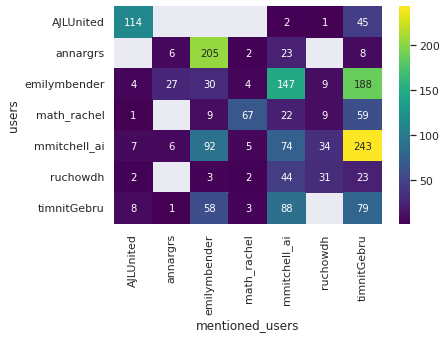

In [ ]:
file = open('Statistics.txt', 'a')
df = pd.read_csv('ai_ethics_tweets.csv')

def MostFrequentUsersPerUsers():
    list_of_users = df['username'].drop_duplicates(keep='first')
    data = []
    
    file.write("\n\nMost Frequent Users Per User\n\n")
    file.write("\n\n'User' 'mentioned_user' 'amount'\n\n")
    print("\nMost Frequent Users Per User\n")
    print("\n'User' 'mentioned_user' 'amount'\n")
    
    for user in list_of_users:
        all_users_mentioned = []
        user_tweets = df[df['username'].str.contains(user)]
        mentioned_users_tweets = user_tweets[user_tweets['text'].str.contains('@')]
        
        for line in mentioned_users_tweets['text']:
            words = line.split()
            for word in words:
                if word.startswith('@'):
                    mentioned_user = word.replace('@', '')
                    if mentioned_user in list_of_users:
                        all_users_mentioned.append(mentioned_user)
        
        frequent_users = Counter(all_users_mentioned).most_common(100)
        for u in frequent_users:
            data.append(f"<'{user}'{str(u).replace('(','[').replace(')',']')}>")

        file.write(f"\n{user}\t{frequent_users}\n")
        print(f"\n{user} {frequent_users}\n")
    
    data = str(data).replace("'<", "[").replace(">'", "]")
    return data

def MostFrequentUser():
    file.write("\n\nMost Frequent Users\n\n")
    file.write("\n\n'User' 'mentioned_user' 'amount'\n\n")
    print("\nMost Frequent Users\n")
    print("\n'User' 'mentioned_user' 'amount'\n")
       
    mentioned_users_tweets = df[df['text'].str.contains('@')]
    all_users_mentioned = []

    for line in mentioned_users_tweets['text']:
        words = line.split() 
        for word in words:
            if word.startswith('@'):
                all_users_mentioned.append(word)    

    frequent_users = Counter(all_users_mentioned).most_common(10)
    
    file.write("\n")
    file.write(str(frequent_users))
    file.write("\n")
    print(frequent_users)

def HeatmapUsers(data):
    heatmap = pd.DataFrame(eval(data), columns=['users', 'mentioned_users', 'amount'])
    result = heatmap.pivot(index='users', columns='mentioned_users', values='amount')
    sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
    plt.savefig('HeatmapUsers.png', bbox_inches='tight')
    plt.show()
    plt.close()
 

def Main():
  file.write("\n\n####Total Statistics####\n\n")
  print("\n####Total Statistics####\n")
  MostFrequentUser()

  file.write("\n\n####Statistics Per User####\n\n")
  print("\n####Statistics Per User####\n")
  dfusers = MostFrequentUsersPerUsers()

  HeatmapUsers(dfusers)
  
  
Main()

### Question 4: Visualization

1. Plot the number of tweets (for all members in _EIG_ in total) per week. 
    * Interpret the graph. Can you explain the fluctuations?
    * (If needed, restrict the dataframe to an active twitter timeframe)

2. Plot the (Twitter) popularity per member in _EIG_ over time (choose the frequency of your choice) by:
    * Number of retweets
    * Number of likes
  
  You can either try to plot these in the same figure, or create multiple figures.
  
  Provide a title, correct axis labels, and a legend for your graphs. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


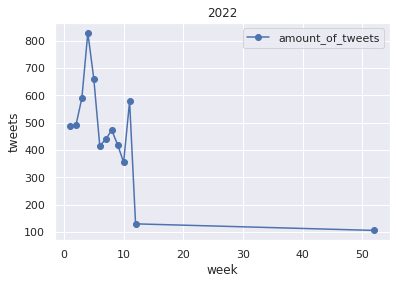

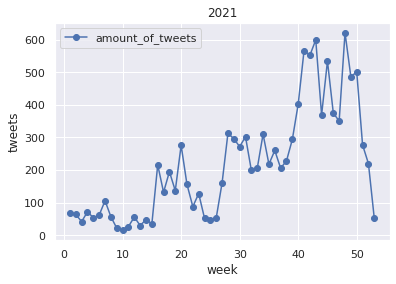

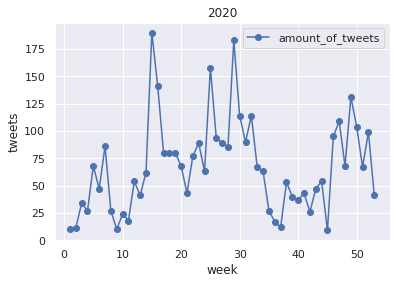

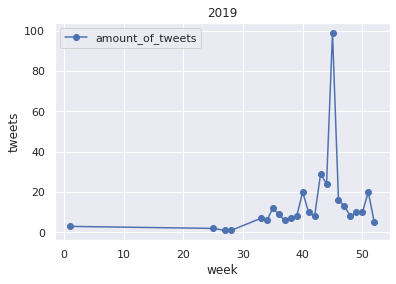

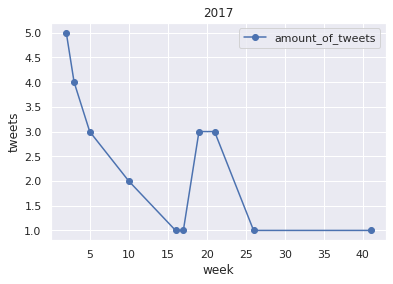

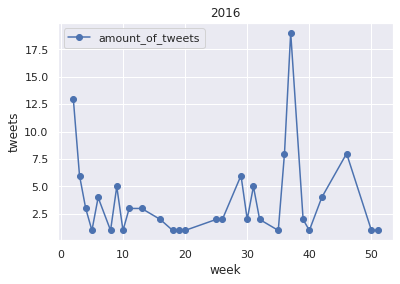

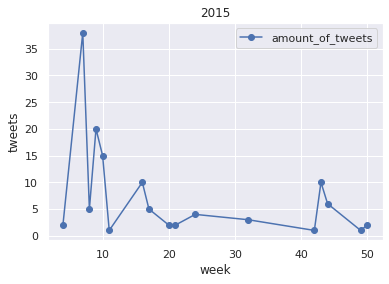

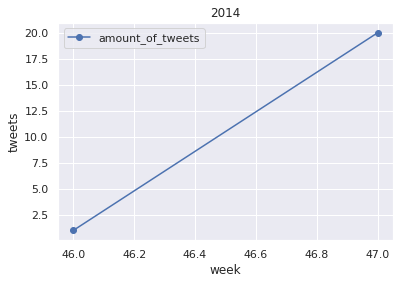

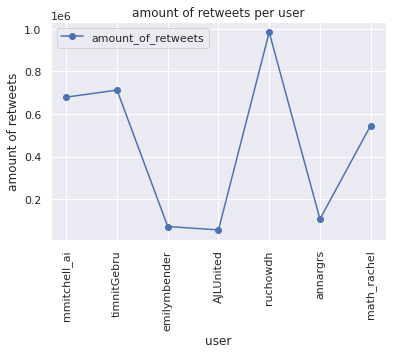

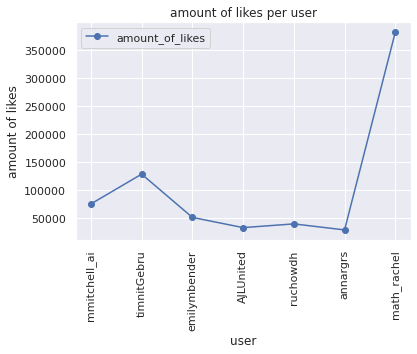

In [ ]:
def SortDataForTweetsPerWeek():
  df = pd.read_csv('ai_ethics_tweets.csv', index_col=[0])
  df['created_at'] = pd.to_datetime(df['created_at'], infer_datetime_format=False)
  df['week_of_year'] = df['created_at'].dt.week
  df['year']= df['created_at'].dt.year
  df.to_csv('ai_ethics_tweets.csv')

def CountTweetsPerWeek():
  df = pd.read_csv('ai_ethics_tweets.csv')
  listOfYears = df['year'].drop_duplicates(keep='first')  
  tweetsPerWeek = []
  
  for year in listOfYears:
    messages = []
    SortWeeks = df[df.year.astype(str).str.contains(str(year))]
    for tweets in SortWeeks.week_of_year:
      messages.append(tweets)   
    perWeek = Counter(messages)
    tweetsPerWeek.append(perWeek.most_common(100))

  return tweetsPerWeek
  
def GenerateDataForTweetsPerWeek(tweetsPerWeek):
    df = pd.read_csv('ai_ethics_tweets.csv')
    list_of_years = df['year'].drop_duplicates(keep='first')
    data = []
    
    for year in list_of_years:
        for line in tweetsPerWeek[list_of_years.index(year)]:
            data.append(f"[{year}{str(line).replace('(',',').replace(')',']')}]")
    
    data = str(data).replace("'[", "[").replace("]'", "]")
    return data

def GeneratePlotsForTweetsPerWeek(data):
    df = pd.read_csv('ai_ethics_tweets.csv')
    list_of_years = df['year'].drop_duplicates(keep='first')
    plot_data = pd.DataFrame(eval(str(data)), columns=['year', 'week', 'amount_of_tweets'])
    
    for year in list_of_years:
        filter_year = plot_data[plot_data['year'].astype(str).str.contains(str(year))]
        sort_by_weeks = filter_year.sort_values('week', axis=0, ascending=True)
        sort_by_weeks.plot(x='week', y='amount_of_tweets', marker='o', title=year)
        plt.ylabel('tweets')
        plt.savefig(f'LinePlot{str(year)}.png', bbox_inches='tight')
        plt.show()
        plt.close()
        print('\n')

def PlotNumOfRetweetsPerUser():
    df = pd.read_csv('ai_ethics_tweets.csv')
    list_of_users = df['username'].drop_duplicates(keep='first')
    count_retweets_per_user = []

    for user in list_of_users:
        sort_users = df[df['username'].str.contains(user)]
        count_retweets_per_user.append(f"['{user}', {sort_users['retweet_count'].sum()}]")

    data = str(count_retweets_per_user).replace('"[', '[').replace(']"', ']')
    plot_data = pd.DataFrame(eval(data), columns=['user', 'amount_of_retweets'])
    plot_data.plot(x='user', y='amount_of_retweets', marker='o', title='amount of retweets per user')
    plt.ylabel('amount of retweets')
    plt.xticks(rotation=90)
    plt.savefig('PlotNumOfRetweets.png', bbox_inches='tight')
    plt.show()
    plt.close()
    print('\n')
  
def PlotNumOfLikesPerUser():
    df = pd.read_csv('ai_ethics_tweets.csv')
    list_of_users = df['username'].drop_duplicates(keep='first')
    count_likes_per_user = []

    for user in list_of_users:
        sort_users = df[df['username'].str.contains(user)]
        count_likes_per_user.append(f"['{user}', {sort_users['favorite_count'].sum()}]")

    data = str(count_likes_per_user).replace('"[', '[').replace(']"', ']')
    plot_data = pd.DataFrame(eval(str(data)), columns=['user', 'amount_of_likes'])
    plot_data.plot(x='user', y='amount_of_likes', marker='o', title='amount of likes per user')
    plt.ylabel('amount of likes')
    plt.xticks(rotation=90)
    plt.savefig('PlotNumOfLikes.png', bbox_inches='tight')
    plt.show()
    plt.close()
    print('\n')

def TweetsPerWeek():
  SortDataForTweetsPerWeek()
  tweetsPerWeek = CountTweetsPerWeek()
  data = GenerateDataForTweetsPerWeek(tweetsPerWeek)
  GeneratePlotsForTweetsPerWeek(data)

def Main():
  TweetsPerWeek()
  PlotNumOfRetweetsPerUser()
  PlotNumOfLikesPerUser()

Main()